In [1]:
import pandas as pd 
import numpy as np
import dask.dataframe as dd

In [2]:
df = dd.read_csv(r"C:\Users\ASUS\Downloads\Astro_project\demo_Z0.00014\output_0.csv")
df.shape

(Delayed('int-084fe0e1-e611-413e-9dfa-e1e43fb96f50'), 22)

## ----LEGENDA EVENTI----

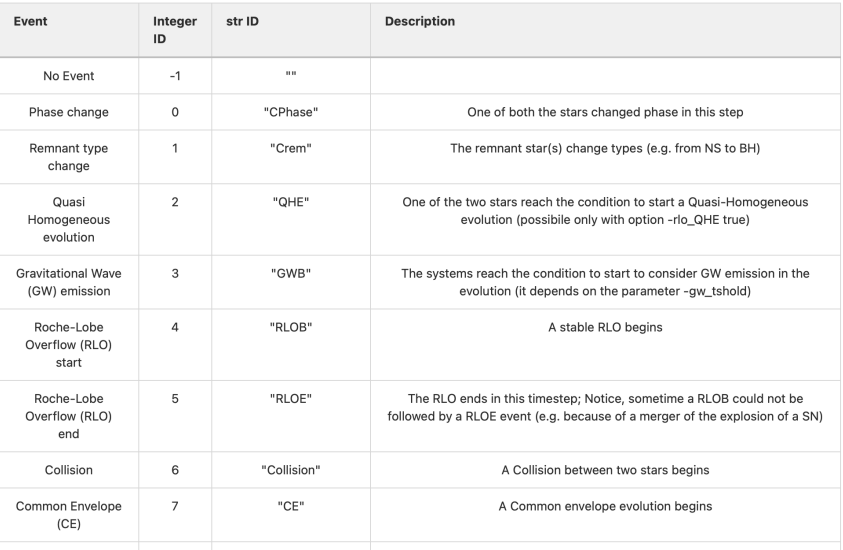
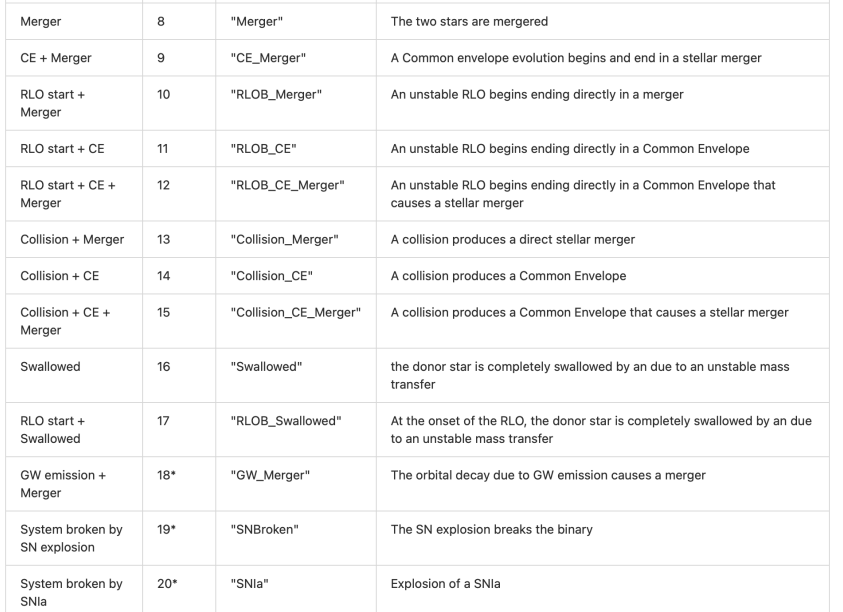

### Wolf Rayet stars

In [3]:
df_WR = df[((df.PhaseBSE_0==8) |  (df.PhaseBSE_0==7) ) ^ ((df.PhaseBSE_1==8) | (df.PhaseBSE_1==7)) ]
print(df_WR.shape)
df_WR.head()

(Delayed('int-8703001c-55cc-4710-8efb-57792a97e792'), 22)


,ID,name,Mass_0,Radius_0,Phase_0,PhaseBSE_0,RemnantType_0,Hsup_0,Mass_1,Radius_1,...,RemnantType_1,Hsup_1,Semimajor,Eccentricity,BWorldtime,Period,GWtime,RL0,RL1,BEvent
119,0,144668535680303,1.208462,0.000016,7,13.0,5,0.0,2.851923,0.392822,...,0,0.0,1.825792,0.0,25.26523,0.000388,119.2750,0.561580,0.830265,11
120,0,144668535680303,1.208462,0.000016,7,13.0,5,0.0,2.851923,0.392822,...,0,0.0,1.825792,0.0,25.26523,0.000388,119.2750,0.561580,0.830265,3
121,0,144668535680303,1.208547,0.000016,7,13.0,5,0.0,2.849096,0.403038,...,0,0.0,1.828423,0.0,25.44216,0.000389,120.1557,0.562543,0.831289,-1
122,0,144668535680303,1.208635,0.000016,7,13.0,5,0.0,2.846250,0.411176,...,0,0.0,1.831391,0.0,25.61908,0.000390,121.1322,0.563611,0.832463,-1
123,0,144668535680303,1.208725,0.000016,7,13.0,5,0.0,2.843405,0.419478,...,0,0.0,1.834617,0.0,25.79601,0.000391,122.1841,0.564759,0.833754,-1


In [6]:
id_WR = df_WR['ID'].drop_duplicates().compute()

### GW BBH merge

In [8]:
df_GW = df[((df.PhaseBSE_0 == 14.0) & (df.PhaseBSE_1 == 14.0) & ((df.GWtime + df.BWorldtime) < int(14e+03)))]

In [9]:
id_GW = df_GW['ID'].drop_duplicates().compute()

In [10]:
id_both = np.intersect1d(id_GW, id_WR)

In [12]:
print('Binary systs that evolve from WR and merge via GW: ', len(id_both))
print('Binary systems that have a WR in some phase: ', len(id_WR))
print('Binary systems that merge via GW: ', len(id_GW))

Binary systs that evolve from WR and merge via GW:  718
Binary systems that have a WR in some phase:  19674
Binary systems that merge via GW:  857


### ROCHE LOBE

In [14]:
#DA CONTROLLARE
#count the number of mass transfer event, distinguishing between stable roche lobe overflows and common envelopes

#counting the number of mass transfer events
num_mt=((df['BEvent'] >= 4) & (df['BEvent'] != 5)).sum().compute() 
print("mass transfer events: ", num_mt)

#counting the number of mass transfer events resulted in stable roche lobe overflow
num_srl=(df['BEvent'] == 5).sum().compute() 
print("stable roche lobe events: ", num_srl)

#counting the number of mass transfer events resulted in a common envelope
num_ce=((df['BEvent'] == 7) | (df['BEvent'] == 9) | (df['BEvent'] == 11) | (df['BEvent'] == 12) | (df['BEvent'] == 14) | (df['BEvent'] == 15)).sum().compute()  
print("common envelope events: ", num_ce)

mass transfer events:  54368
stable roche lobe events:  9202
common envelope events:  10139


In [16]:
def roche_lobe_search(df, list):
    events = 0
    for i in list:
        events += df[df['BEvent']==i].shape[0].compute()
    
    return events


#counting the number of mass transfer events
num_mt=roche_lobe_search(df, [4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]) 
print("mass transfer events: ", num_mt)

#counting the number of mass transfer events resulted in stable roche lobe overflow
num_srl=roche_lobe_search(df, [5])
print("stable roche lobe events: ", num_srl)

#counting the number of mass transfer events resulted in a common envelope
num_ce=roche_lobe_search(df, [7,9,11,12,14,15]) 
print("common envelope events: ", num_ce)

KeyboardInterrupt: 